<a href="https://colab.research.google.com/github/emichester/07MIAR_Redes_Neuronales_y_Deep_Learning/blob/main/ProyectoDeProgramacion/07MIAR_Proyecto_Programacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes del grupo:
- [Emilio Jesús Hernández Salas](mailto:emiliohersal@gmail.com)
- [Inés Mari Rivero](i.mari.rivero@gmail.com)
- [Ignacio Guerra Sevillano](iguerrasevillano@gmail.com)

# 07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación "*Deep Vision in classification tasks*"


## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. Los alumnos deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera el uso de todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

## Normas a seguir

- Será **indispensable** realizar el **trabajo por parejas**. Dichas parejas de alumnxs se generarán **de manera automática** teniendo en cuenta el pais de residencia con el objetivo de facilitar el trabajo en equipo.  
- Se debe entregar un **ÚNICO FICHERO PDF POR ALUMNO** que incluya las instrucciones presentes en el Colab Noteboook y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso llevado a cabo en cada estrategia (i.e. carga de datos, inspección de datos, acondicionamiento, proceso de entrenamiento y proceso de validación del modelo).
- **La memoria del trabajo** (el fichero PDF mencionado en el punto anterior) deberá **subirla cada integrante del grupo** (aunque se trate de un documento idéntico) a la actividad que se habilitará **en CampusVIU**.
- Se recomienda trabajar respecto a un directorio base (**BASE_FOLDER**) para facilitar el trabajo en equipo. En este notebook se incluye un ejemplo de cómo almacenar/cargar datos utilizando un directorio base.
- Las **redes propuestas** deben estar **entrenadas** (y **EVIDENCIAR este proceso en el documento PDF**). La entrega de una **red sin entrenar** supondrá **perdida de puntos**.
- Si se desea **evidenciar alguna métrica** del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas.
- Todos los **gráficos** que se deseen mostrar deberán **generarse en el Colab Notebook** para que tras la conversión aparezcan en el documento PDF.

## *Tips* para realizar la actividad con éxito
- Los **datos** se cargarán directamente **desde** la plataforma **Kaggle** mediante su API (https://github.com/Kaggle/kaggle-api). En este Notebook se incluye un ejemplo de como hacerlo. Se recomienda generar una función que aborde esta tarea.
- El **documento PDF a entregar** como solución de la actividad se debe **generar automáticamente desde el fichero ".ipynb"**. En este Notebook se incluye un ejemplo de como hacerlo.
- **Generar secciones y subsecciones en el Colab Notebook** supondrá que el documento **PDF generado** queda totalmente **ordenado** facilitando la evaluación al docente.
- Se recomienda encarecidamente **incluir comentarios concisos pero aclaratorios**.
- Es muy recomendable crear una **última sección** de texto en el Colab Notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterios de evaluación

- **Seguimiento** de las **normas establecidas** en la actividad (detalladas anteriormente).
- Creación de una **solución que resuelva la tarea de clasificación**, i.e. que las figuras de mérito empleadas para medir la bondad del modelo predictivo evidencien un *performance* superior al rendimiento estocástico.
- **Claridad** en la creación de la solución, en las justificaciones sobre la toma de decisiones llevada a cabo así como en las comparativas y conclusiones finales.
- **Efectividad** al presentar las comparaciones entre métricas de evaluación de ambas estrategias.
- **Demostración** de la utilización de **técnicas de regularización** para mejorar el rendimiento de los modelos.

## Descarga de datos desde la plataforma Kaggle

In [ ]:
# En primer lugar se debe generar un API de Kaggle personal, para ello:
#  1. Registrarse en  https://www.kaggle.com
#  2. Ir a 'Account tab' de tu perfil y seleccionar 'Create API Token'
#  3. Almacenar en tu ordenador local el fichero kaggle.json

**Montamos drive y generamos el BASE_PATH**

In [1]:
# SOLO PARA USO EN GOOGLE COLABORATORY
# Para conectar el notebook con la cuenta de gdrive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
BASE_PATH = "/content/drive/My Drive/ASIGNATURAS/VIU/07MIAR_Redes_Neuronales_y_Deep_Learning/ProyectoProgramacionFinal"

In [4]:
import os
os.chdir(BASE_PATH)

In [5]:
%ls

kaggle.json


**Instalación de la API de kaggle y otras operaciones**

In [6]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110683 sha256=16416528d37a28642adc31bf4e4a3e5a650433a6742a1d6e08588b385cc66ded
  Stored in directory: /root/.cache/pip/wheels/43/4b/fb/736478af5e8004810081a06259f9aa2f7c3329fc5d03c2c412
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [7]:
# %%capture
# # Seleccionar el API Token personal previamente descargado (fichero kaggle.json)
# from google.colab import files
# files.upload()

In [8]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
# Ya podemos listar los datasets disponibles en kaggle para su descarga
!kaggle datasets list

ref                                                          title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                      Most Streamed Spotify Songs 2023               47KB  2023-08-26 11:04:57          24101        733  1.0              
fortuneuwha/world-instant-noodles-consumption-2022           World Instant Noodles Consumption 2022          2KB  2023-10-02 17:06:28            712         23  1.0              
joebeachcapital/students-performance                         Students Performance                            2KB  2023-08-31 00:50:11           8776        201  1.0              
nelgiriyewithana/credit-card-fraud-detection-dataset-2023    Credit Card Fraud Detection Dataset 2023    

**Descarga del dataset**

In [10]:
# IMPORTANTE ANTES DE DESCARGAR UN DATASET !!!
# Antes de descargar el dataset debemos ir a https://www.kaggle.com/c/$nameCompetition/data y aceptar las "Competition Rules"
# En caso de no realizar el paso anterior al descargar el dataset obtenedremos el siguiente mensaje "403 - Forbidden"
# AHORA SI: Descarguemos un dataset de cierta competición
# !kaggle competitions download -c dogs-vs-cats-redux-kernels-edition
!kaggle datasets download -d gpiosenka/100-bird-species

#NOTA: El nombre del dataset de competición a descargar se informará en el documento en el que se presenten las parejas formadas

100% 1.95G/1.96G [00:27<00:00, 78.7MB/s]
100% 1.96G/1.96G [00:27<00:00, 76.0MB/s]


In [11]:
%ls

100-bird-species.zip  kaggle.json


In [12]:
# Creemos un directorio para descomprimir los datos
!mkdir my_dataset

In [ ]:
# Descomprimimos los datos y los dejamos listos para trabajar
# !unzip dogs-vs-cats-redux-kernels-edition.zip -d my_dataset
!unzip 100-bird-species.zip -d my_dataset

In [17]:
%ls my_dataset/

 birds.csv                                   test/    valid/
'EfficientNetB0-525-(224 X 224)- 98.97.h5'   train/


# Resolución del problema

## 0. Imports

In [39]:
# system
import os
import glob

# CV
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ML
import tensorflow as tf

# Data
import pandas as pd

# other

## 1. Carga del conjunto de datos

In [22]:
# SOLO PARA USO EN GOOGLE COLABORATORY
# Para conectar el notebook con la cuenta de gdrive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [23]:
BASE_PATH = "/content/drive/My Drive/ASIGNATURAS/VIU/07MIAR_Redes_Neuronales_y_Deep_Learning/ProyectoProgramacionFinal"

In [24]:
os.chdir(BASE_PATH)

## 2. Inspección del conjunto de datos

In [25]:
files = os.listdir(os.path.join(BASE_PATH,"my_dataset","train"))

print("Total de clases: ", len(files))
print("Algunas de ellas son: \n",)
files[:10]

Total de clases:  525
Algunas de ellas son: 



['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS']

EL dataset ya ha sido separado por la persona que lo facilita en subcarpetas (train, test, valid) siendo las imágenes contenidas en train y valid seleccionadas a mano por su buena calidad. Así que podríamos usarlas con el fin de probar el modelo o no puesto que hay sólo 5 por cada clase.

In [27]:
cpt = sum([len(files) for r, d, files in os.walk(os.path.join(BASE_PATH,"my_dataset/train/"))])
print("Imágenes carpeta de entrenamiento: ",cpt)
cpt = sum([len(files) for r, d, files in os.walk(os.path.join(BASE_PATH,"my_dataset/test/"))])
print("Imágenes carpeta de test: ",cpt)
cpt = sum([len(files) for r, d, files in os.walk(os.path.join(BASE_PATH,"my_dataset/valid/"))])
print("Imágenes carpeta de valid: ",cpt)

Imágenes carpeta de entrenamiento:  84635
Imágenes carpeta de test:  2625
Imágenes carpeta de valid:  2625


Consiste en una recopilación de información sobre 525 especies de aves. 84635 imágenes de entrenamiento, 2625 imágenes de prueba (cinco imágenes por especie) y 2625 imágenes de validación (cinco imágenes por especie).En cada imagen sólo se tiene un ave, que suele ocupar al menos el 50% de los píxeles de la imagen.

Veamos si las clases están balanceadas.

In [ ]:
os.listdir(os.path.join(BASE_PATH,"my_dataset","train"))

In [48]:
_classes_data = {
    "Class" : [],
    "NumImages" : []
}
for root, dirs, files in os.walk(os.path.join(BASE_PATH,"my_dataset/train/")):
    # print(root,"---",dirs,"---",files)
    if root.split("/")[-1] != "":
        _classes_data["Class"] += [root.split("/")[-1]]
        _classes_data["NumImages"] += [len(files)]

In [43]:
_classes_df = pd.DataFrame(_classes_data)
_classes_df.describe()

,NumImages
count,525.000000
mean,161.209524
std,20.621588
min,130.000000
25%,150.000000
50%,158.000000
75%,170.000000
max,263.000000


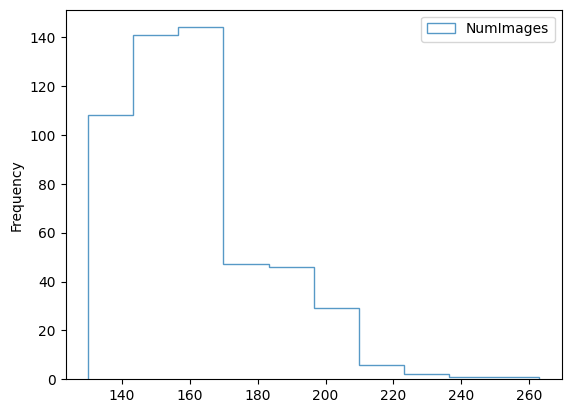

In [46]:
_classes_df.plot(kind='hist', histtype='step', facecolor='g',
               alpha=0.75);

Como podemos observar las clases no están balanceadas, esto podría llevarnos a un problema de precisión con algunas de ellas. Veamos si podemos hacer algo para intentar palear este problema más adelante.

Veamos algunas de las imágenes. Para ello podemos hacer uso del csv que nos proporciona el creador del dataset "birds.csv"

In [58]:
with open(os.path.join(BASE_PATH,"my_dataset","birds.csv"), "r") as f:
    text = f.read()

print(text[:200])

class id,filepaths,labels,data set,scientific name
0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABB


In [60]:
birds_df = pd.read_csv(os.path.join(BASE_PATH,"my_dataset","birds.csv"), sep=",")
display(birds_df.sample(5))

,class id,filepaths,labels,data set,scientific name
6978,43.0,train/AUSTRAL CANASTERO/143.jpg,AUSTRAL CANASTERO,train,ASTHENES ANTHOIDES
60627,380.0,train/PINK ROBIN/125.jpg,PINK ROBIN,train,PETROICA RODINOGASTER
84624,524.0,train/BLACK BREASTED PUFFBIRD/145.jpg,BLACK BREASTED PUFFBIRD,train,NOTHARCHUS PECTORALIS
15606,99.0,train/BLUE MALKOHA/025.jpg,BLUE MALKOHA,train,CEUTHMOCHARES AEREUS
33284,209.0,train/ENGGANO MYNA/113.jpg,ENGGANO MYNA,train,GRACULA ENGANENSIS


Podemos ejecutar el siguiente bloque de código para generar una vista de las imágenes de forma aleatoria.

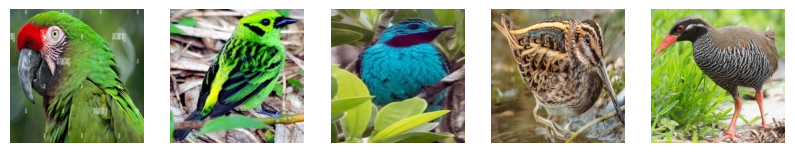

In [92]:
fig, axes = plt.subplots(1,5,figsize=(10,2))
for k, idx in enumerate(birds_df.sample(5).index):
    row = birds_df.loc[idx]
    img = plt.imread(os.path.join(BASE_PATH,"my_dataset",row['filepaths']))
    axes[k].imshow(img)
    axes[k].axis('off')
plt.show()

In [67]:
print("Tamaño de las imágenes: ", img.shape)

Tamaño de las imágenes:  (224, 224, 3)


Como podemos observar, las imágenes son 224x224 y en formato RGB (3 canales). También podemos observar que en algunas imágenes tenemos una marca de agua, esto es, según explica el creador del dataset, porque las imágenes han sido sacadas mediante búsqueda en google y luego recortadas. Debido a esto vamos a contar con este tipo de ruido en las imágenes.

## 3. Acondicionamiento del conjunto de datos

¿Qué podemos hacer para mejorar nuesto dataset? Ideas:


1. Eliminar las imágenes que tienen marca de agua para evitar que el modelo extraiga características espúreas de las imágenes.
2. Hacer Data Augmentation sobre las imágenes, sobre todo en los casos de clases desbalanceadas. La otra opción es reducir el número de imágenes de las clases con mayor cantidad y finalmente realizar Data Augmentation sobre todas.
3. Reducir la resolución de las imágenes para disminuir el tiempo de entrenamiento.



## 4. Desarrollo de la arquitectura de red neuronal y entrenamiento de la solución

Pasos a seguir

1. Probar con un Perceptrón Multicapa (MLP), de esta forma tenemos un nivel base sobre el que trabajar.
2. Probar con una CNN sencilla, jugando con los bloques y el número de filtros.
3. Probar con la CNN resultante incorporando los métodos aprendidos para reducir el overfitting.
4. Probar con alguna red ya cononocida haciendo uso de transfer learning y fine tunning.
5. Probar con otra red siguiendo los pasos del punto anterior.
6. Seleccionar el mejor modelo

## 5. Monitorización del proceso de entrenamiento para la toma de decisiones

## 6. Evaluación del modelo predictivo y planteamiento de la siguiente prueba experimental

# Ejemplos útiles para la entrega

## Ejemplo de escritura de datos tomando como referencia un BASE_FOLDER

In [ ]:
# # Conectamos con nuestro Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # Establezco una ruta absoluta a un directorio existente de mi Google Drive
# BASE_FOLDER = "/content/drive/MyDrive/07MIAR_Proyecto_Programacion/"

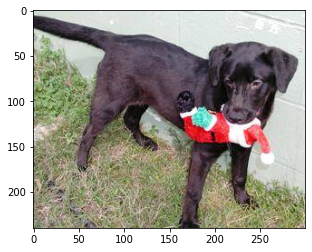

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Escogiendo y mostrando una imagen al azar del conjunto de test
idx = np.random.randint(1, 12000)
img = cv2.imread('test/' + str(idx) + '.jpg', cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
# Almacenando una imagen aleatoria de test en mi BASE_FOLDER
cv2.imwrite(BASE_FOLDER + 'my_pet.png', img)

True

## Ejemplo de generación de documento PDF a partir del Colab Notebook (fichero ".ipynb")

In [ ]:
# Ejecutando los siguientes comandos en la última celda del Colab Notebook se convierte de ".ipynb" a PDF
# En caso de querer ocultar la salida de una celda puesto que no tenga relevancia se debe insertar
# el comando %%capture al inicio de la misma. Véase la celda que contiene !ls test en este Notebook.

In [ ]:
name_IPYNB_file = '07MIAR_Proyecto_Programacion.ipynb'
get_ipython().system(
        "apt update >> /dev/null && apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended >> /dev/null"
    )
get_ipython().system(
            "jupyter nbconvert --output-dir='$BASE_FOLDER' '$BASE_FOLDER''$name_IPYNB_file' --to pdf"
        )





[NbConvertApp] Converting notebook /content/drive/MyDrive/07MIAR_Proyecto_Programacion/07MIAR_Proyecto_Programacion.ipynb to pdf
[NbConvertApp] Support files will be in 07MIAR_Proyecto_Programacion_files/
[NbConvertApp] Making directory ./07MIAR_Proyecto_Programacion_files
[NbConvertApp] Writing 43232 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 179055 bytes to /content/drive/MyDrive/07MIAR_Proyecto_Programacion/07MIAR_Proyecto_Programacion.pdf
